In [13]:
import pandas as pd
from localutils.dockerscanhelper import DockerImageScanner

images = [
    "nginx:1.16",
    "ubuntu:22.04",
    "alpine:3.15",
    "postgres:10",
    "mysql:8.0",
    "python:3.10",
    "node:18",
    "ruby:3.0",
    "php:8.0",
    "tomcat:9",
    "redis:6",
    "mariadb:10",
    "jenkins:latest-jdk17"
    "elasticsearch:8.15.0",
    "memcached:1.6.33",
    "openjdk:24-ea-17-jdk-bullseye",
    "bitnami/mysql:8.0",
]

df = pd.DataFrame(images, columns=["image"])
df.to_csv("output/images.csv", index=False)

In [14]:
scanner = DockerImageScanner()


2025-03-16 13:44:46,047 - pygrype.logging - INFO - Using Grype 0.89.0


2025-03-16 13:44:46,047 - INFO - Using Grype 0.89.0
2025-03-16 13:44:46,075 - INFO - Initialized DockerRegistryScanner with registry URL: None


In [4]:
dfs = []
images = pd.read_csv("output/images.csv")
dfs = [scanner.scan_image_with_grype(image) for image in images["image"]]
valid_dfs = [d for d in dfs if isinstance(d, pd.DataFrame)]
results = pd.concat(valid_dfs)


2025-03-16 13:35:43,024 - INFO - Scanning image with Grype: nginx:1.16 ...


2025-03-16 13:35:43,024 - pygrype.logging - DEBUG - Running: ['nginx:1.16', '--output', 'json']


2025-03-16 13:35:43,024 - DEBUG - Running: ['nginx:1.16', '--output', 'json']
2025-03-16 13:35:57,686 - INFO - Grype scan results: image: nginx:1.16, found: 455 vulnerabilities
2025-03-16 13:35:57,687 - INFO - Parsing Grype scan results ...
2025-03-16 13:35:57,689 - INFO - Scanning image with Grype: ubuntu:22.04 ...


2025-03-16 13:35:57,689 - pygrype.logging - DEBUG - Running: ['ubuntu:22.04', '--output', 'json']


2025-03-16 13:35:57,689 - DEBUG - Running: ['ubuntu:22.04', '--output', 'json']
2025-03-16 13:36:03,457 - INFO - Grype scan results: image: ubuntu:22.04, found: 60 vulnerabilities
2025-03-16 13:36:03,458 - INFO - Parsing Grype scan results ...
2025-03-16 13:36:03,459 - INFO - Scanning image with Grype: alpine:3.15 ...


2025-03-16 13:36:03,459 - pygrype.logging - DEBUG - Running: ['alpine:3.15', '--output', 'json']


2025-03-16 13:36:03,459 - DEBUG - Running: ['alpine:3.15', '--output', 'json']
2025-03-16 13:36:05,916 - INFO - Grype scan results: image: alpine:3.15, found: 14 vulnerabilities
2025-03-16 13:36:05,917 - INFO - Parsing Grype scan results ...
2025-03-16 13:36:05,918 - INFO - Scanning image with Grype: postgres:10 ...


2025-03-16 13:36:05,918 - pygrype.logging - DEBUG - Running: ['postgres:10', '--output', 'json']


2025-03-16 13:36:05,918 - DEBUG - Running: ['postgres:10', '--output', 'json']
2025-03-16 13:36:18,653 - INFO - Grype scan results: image: postgres:10, found: 427 vulnerabilities
2025-03-16 13:36:18,653 - INFO - Parsing Grype scan results ...
2025-03-16 13:36:18,655 - INFO - Scanning image with Grype: mysql:8.0 ...


2025-03-16 13:36:18,655 - pygrype.logging - DEBUG - Running: ['mysql:8.0', '--output', 'json']


2025-03-16 13:36:18,655 - DEBUG - Running: ['mysql:8.0', '--output', 'json']
2025-03-16 13:36:47,110 - INFO - Grype scan results: image: mysql:8.0, found: 64 vulnerabilities
2025-03-16 13:36:47,111 - INFO - Parsing Grype scan results ...
2025-03-16 13:36:47,112 - INFO - Scanning image with Grype: python:3.10 ...


2025-03-16 13:36:47,112 - pygrype.logging - DEBUG - Running: ['python:3.10', '--output', 'json']


2025-03-16 13:36:47,112 - DEBUG - Running: ['python:3.10', '--output', 'json']
2025-03-16 13:37:29,878 - INFO - Grype scan results: image: python:3.10, found: 761 vulnerabilities
2025-03-16 13:37:29,879 - INFO - Parsing Grype scan results ...
2025-03-16 13:37:29,881 - INFO - Scanning image with Grype: node:18 ...


2025-03-16 13:37:29,881 - pygrype.logging - DEBUG - Running: ['node:18', '--output', 'json']


2025-03-16 13:37:29,881 - DEBUG - Running: ['node:18', '--output', 'json']
2025-03-16 13:38:21,559 - INFO - Grype scan results: image: node:18, found: 721 vulnerabilities
2025-03-16 13:38:21,560 - INFO - Parsing Grype scan results ...
2025-03-16 13:38:21,563 - INFO - Scanning image with Grype: ruby:3.0 ...


2025-03-16 13:38:21,563 - pygrype.logging - DEBUG - Running: ['ruby:3.0', '--output', 'json']


2025-03-16 13:38:21,563 - DEBUG - Running: ['ruby:3.0', '--output', 'json']
2025-03-16 13:39:02,644 - INFO - Grype scan results: image: ruby:3.0, found: 1289 vulnerabilities
2025-03-16 13:39:02,645 - INFO - Parsing Grype scan results ...
2025-03-16 13:39:02,648 - INFO - Scanning image with Grype: php:8.0 ...


2025-03-16 13:39:02,648 - pygrype.logging - DEBUG - Running: ['php:8.0', '--output', 'json']


2025-03-16 13:39:02,648 - DEBUG - Running: ['php:8.0', '--output', 'json']
2025-03-16 13:39:23,382 - INFO - Grype scan results: image: php:8.0, found: 625 vulnerabilities
2025-03-16 13:39:23,382 - INFO - Parsing Grype scan results ...
2025-03-16 13:39:23,385 - INFO - Scanning image with Grype: tomcat:9 ...


2025-03-16 13:39:23,385 - pygrype.logging - DEBUG - Running: ['tomcat:9', '--output', 'json']


2025-03-16 13:39:23,385 - DEBUG - Running: ['tomcat:9', '--output', 'json']
2025-03-16 13:39:50,195 - INFO - Grype scan results: image: tomcat:9, found: 184 vulnerabilities
2025-03-16 13:39:50,196 - INFO - Parsing Grype scan results ...
2025-03-16 13:39:50,197 - INFO - Scanning image with Grype: redis:6 ...


2025-03-16 13:39:50,197 - pygrype.logging - DEBUG - Running: ['redis:6', '--output', 'json']


2025-03-16 13:39:50,197 - DEBUG - Running: ['redis:6', '--output', 'json']
2025-03-16 13:39:58,174 - INFO - Grype scan results: image: redis:6, found: 129 vulnerabilities
2025-03-16 13:39:58,175 - INFO - Parsing Grype scan results ...
2025-03-16 13:39:58,176 - INFO - Scanning image with Grype: mariadb:10 ...


2025-03-16 13:39:58,176 - pygrype.logging - DEBUG - Running: ['mariadb:10', '--output', 'json']


2025-03-16 13:39:58,176 - DEBUG - Running: ['mariadb:10', '--output', 'json']
2025-03-16 13:40:12,661 - INFO - Grype scan results: image: mariadb:10, found: 133 vulnerabilities
2025-03-16 13:40:12,662 - INFO - Parsing Grype scan results ...
2025-03-16 13:40:12,663 - INFO - Scanning image with Grype: jenkins:latest-jdk17elasticsearch:8.15.0 ...


2025-03-16 13:40:12,663 - pygrype.logging - DEBUG - Running: ['jenkins:latest-jdk17elasticsearch:8.15.0', '--output', 'json']


2025-03-16 13:40:12,663 - DEBUG - Running: ['jenkins:latest-jdk17elasticsearch:8.15.0', '--output', 'json']
2025-03-16 13:40:13,112 - ERROR - Error scanning image with Grype: Expecting value: line 1 column 1 (char 0)
2025-03-16 13:40:13,115 - INFO - Scanning image with Grype: memcached:1.6.33 ...


2025-03-16 13:40:13,115 - pygrype.logging - DEBUG - Running: ['memcached:1.6.33', '--output', 'json']


2025-03-16 13:40:13,115 - DEBUG - Running: ['memcached:1.6.33', '--output', 'json']
2025-03-16 13:40:20,630 - INFO - Grype scan results: image: memcached:1.6.33, found: 73 vulnerabilities
2025-03-16 13:40:20,631 - INFO - Parsing Grype scan results ...
2025-03-16 13:40:20,632 - INFO - Scanning image with Grype: openjdk:24-ea-17-jdk-bullseye ...


2025-03-16 13:40:20,632 - pygrype.logging - DEBUG - Running: ['openjdk:24-ea-17-jdk-bullseye', '--output', 'json']


2025-03-16 13:40:20,632 - DEBUG - Running: ['openjdk:24-ea-17-jdk-bullseye', '--output', 'json']
2025-03-16 13:41:01,126 - INFO - Grype scan results: image: openjdk:24-ea-17-jdk-bullseye, found: 676 vulnerabilities
2025-03-16 13:41:01,126 - INFO - Parsing Grype scan results ...
2025-03-16 13:41:01,129 - INFO - Scanning image with Grype: bitnami/mysql:8.0 ...


2025-03-16 13:41:01,129 - pygrype.logging - DEBUG - Running: ['bitnami/mysql:8.0', '--output', 'json']


2025-03-16 13:41:01,129 - DEBUG - Running: ['bitnami/mysql:8.0', '--output', 'json']
2025-03-16 13:41:27,409 - INFO - Grype scan results: image: bitnami/mysql:8.0, found: 283 vulnerabilities
2025-03-16 13:41:27,410 - INFO - Parsing Grype scan results ...


In [15]:
results

,image_name,vuln_id,severity,vuln_desc,data_src,package_name,package_ver,package_url,fixed_ver
0,nginx:1.16,CVE-2018-25012,Critical,A heap-based buffer overflow was found in libw...,debian,libwebp6,0.6.1-2,pkg:deb/debian/libwebp6@0.6.1-2?arch=arm64&dis...,< 0.6.1-2+deb10u1 (deb)
1,nginx:1.16,CVE-2022-1292,Critical,The c_rehash script does not properly sanitise...,debian,libssl1.1,1.1.1d-0+deb10u3,pkg:deb/debian/libssl1.1@1.1.1d-0%2Bdeb10u3?ar...,< 1.1.1n-0+deb10u2 (deb)
2,nginx:1.16,CVE-2019-20367,Critical,nlist.c in libbsd before 0.10.0 has an out-of-...,debian,libbsd0,0.9.1-2,pkg:deb/debian/libbsd0@0.9.1-2?arch=arm64&dist...,< 0.9.1-2+deb10u1 (deb)
3,nginx:1.16,CVE-2021-33574,Critical,The mq_notify function in the GNU C Library (a...,debian,libc-bin,2.28-10,pkg:deb/debian/libc-bin@2.28-10?arch=arm64&dis...,< 2.28-10+deb10u2 (deb)
4,nginx:1.16,CVE-2021-35942,Critical,The wordexp function in the GNU C Library (aka...,debian,libc-bin,2.28-10,pkg:deb/debian/libc-bin@2.28-10?arch=arm64&dis...,< 2.28-10+deb10u2 (deb)
...,...,...,...,...,...,...,...,...,...
278,bitnami/mysql:8.0,CVE-2025-1150,Negligible,A vulnerability was found in GNU Binutils 2.43...,debian,libbinutils,2.40-2,pkg:deb/debian/libbinutils@2.40-2?arch=arm64&d...,none (unknown)
279,bitnami/mysql:8.0,CVE-2025-24528,Unknown,None,debian,libkrb5support0,1.20.1-2+deb12u2,pkg:deb/debian/libkrb5support0@1.20.1-2%2Bdeb1...,none (unknown)
280,bitnami/mysql:8.0,CVE-2025-24528,Unknown,None,debian,libgssapi-krb5-2,1.20.1-2+deb12u2,pkg:deb/debian/libgssapi-krb5-2@1.20.1-2%2Bdeb...,none (unknown)
281,bitnami/mysql:8.0,CVE-2025-24528,Unknown,None,debian,libkrb5-3,1.20.1-2+deb12u2,pkg:deb/debian/libkrb5-3@1.20.1-2%2Bdeb12u2?ar...,none (unknown)


In [5]:
df.to_csv("output/scan_results-20250315.csv", index=False)

In [12]:
df

,image
0,nginx:1.16
1,ubuntu:22.04
2,alpine:3.15
3,postgres:10
4,mysql:8.0
5,python:3.10
6,node:18
7,ruby:3.0
8,php:8.0
9,tomcat:9


Text(0.5, 1.0, 'Vulnerability Severity Counts')

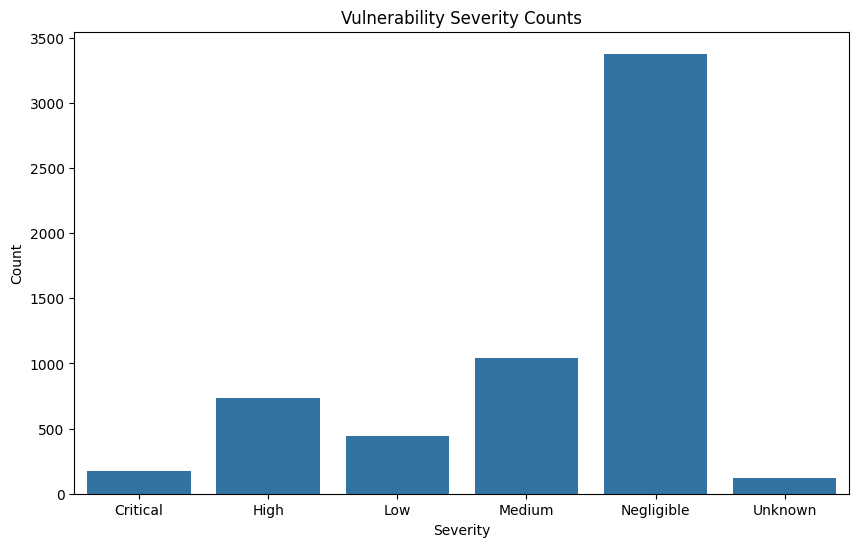

In [17]:
from matplotlib import pyplot as plt
import seaborn as sns

# add labels to each bar

plt.figure(figsize=(10, 6))
sns.countplot(data=results, x="severity")
plt.xlabel("Severity")
plt.ylabel("Count")
plt.title("Vulnerability Severity Counts")



In [19]:
# median vulnerability count by severity
results.groupby("severity").count()

,image_name,vuln_id,vuln_desc,data_src,package_name,package_ver,package_url,fixed_ver
severity,,,,,,,,
Critical,176,176,176,176,176,176,176,176
High,738,738,732,738,738,738,738,738
Low,441,441,306,441,441,441,441,441
Medium,1044,1044,880,1044,1044,1044,1044,1044
Negligible,3376,3376,3355,3376,3376,3376,3376,3376
Unknown,119,119,77,119,119,119,119,119


In [20]:
matrix = pd.read_csv("output/cves_epss_kevs_cwe_enriched-2025-03-06.csv")




/var/folders/7z/yz2432ws1sn3rvp0tf40s2d00000gp/T/ipykernel_76862/4205394151.py:1: DtypeWarning: Columns (4,15,17,24,25) have mixed types. Specify dtype option on import or set low_memory=False.
  matrix = pd.read_csv("output/cves_epss_kevs_cwe_enriched-2025-03-06.csv")


In [21]:
enriched_results = pd.merge(results, matrix, left_on="vuln_id", right_on="cve_id", how="left")

In [22]:
enriched_results.columns

Index(['image_name', 'vuln_id', 'severity', 'vuln_desc', 'data_src',
       'package_name', 'package_ver', 'package_url', 'fixed_ver', 'cve_id',
       'description', 'published_date', 'last_modified_date', 'cvss_version',
       'cwe_id', 'cwe_name', 'cwe_desc', 'cwe_cc_scope', 'cwe_cc_impact',
       'cvss_vector', 'attack_vector', 'attack_complexity',
       'privileges_required', 'user_interaction', 'base_score',
       'base_severity', 'exploitability_score', 'confidentiality_impact',
       'integrity_impact', 'availability_impact', 'cve_exploitable',
       'cve_automatable', 'cve_tech_impact', 'epss', 'percentile',
       'kev_vendor_proj', 'kev_product', 'kev_vuln_name', 'kev_date_added',
       'kev_desc', 'kev_req_action', 'kev_due_date',
       'kev_known_ransom_camp_use', 'notes', 'kev_cwes'],
      dtype='object')

In [23]:
# make all colunm name lowercase
enriched_results.columns = enriched_results.columns.str.lower()
enriched_results = enriched_results.rename(columns={"datasource": "data_source"})
enriched_results = enriched_results.drop(columns=["cve_id", "description"])
# fill all NaN values with "not_found"
enriched_results = enriched_results.fillna("not_found")

In [24]:
enriched_results.to_csv("output/enriched_scan_results-20250315.csv", index=False)

In [ ]:
enriched_results

,image_name,vuln_id,severity,vuln_desc,data_src,package_name,package_ver,package_url,fixed_ver,published_date,...,kev_vendor_proj,kev_product,kev_vuln_name,kev_date_added,kev_desc,kev_req_action,kev_due_date,kev_known_ransom_camp_use,notes,kev_cwes
count,5894,5894,5894,5894,5894,5894,5894,5894,5894,5894,...,5894,5894,5894,5894,5894,5894,5894,5894,5894,5894
unique,15,778,6,782,5,309,281,680,225,299,...,3,4,4,4,4,3,4,2,4,3
top,ruby:3.0,CVE-2023-4039,Negligible,not_found,debian,stdlib,2.35.2-2,pkg:golang/stdlib@1.18.2,none (unknown),not_found,...,not_found,not_found,not_found,not_found,not_found,not_found,not_found,not_found,not_found,not_found
freq,1289,103,3376,368,5270,251,972,174,4583,2737,...,5886,5886,5886,5886,5886,5886,5886,5886,5886,5886
